In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("stroke_predtrain.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


In [11]:
#assessing normality
from scipy.stats import shapiro
stat= shapiro(df["bmi"].dropna())
print(f"result is: {stat.statistic: .3f} and p-value is: {stat.pvalue: .3f}")
#since the data is not normal, let's fill the NA with medians

result is:  0.970 and p-value is:  0.000


In [12]:
df["bmi"].fillna(value=df["bmi"].median(), inplace=True)

In [17]:
df=df.drop("id", axis=1)

KeyError: "['id'] not found in axis"

In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1132,Female,1,0,0,No,children,Rural,110.17,20.3,Unknown,0
1133,Male,6,0,0,No,children,Rural,92.98,18.9,Unknown,0
1134,Male,81,0,0,Yes,Private,Urban,234.35,25.3,formerly smoked,0
1135,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


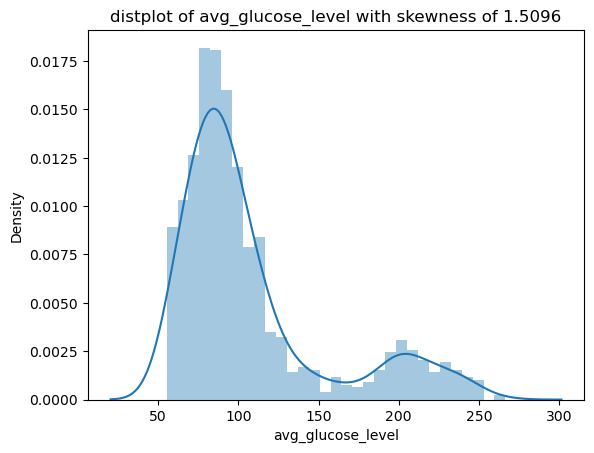

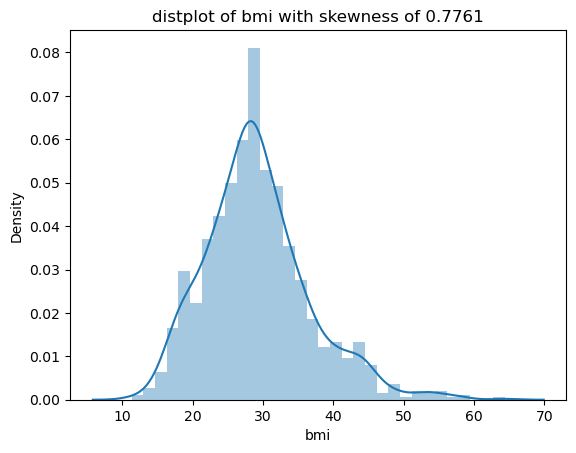

In [22]:
for i in df.select_dtypes(include="float"):
    plt.figure()
    skewness=round(df[i].skew(),4)
    sns.distplot(df[i])
    plt.title(f"distplot of {i} with skewness of {skewness}")
    plt.show()

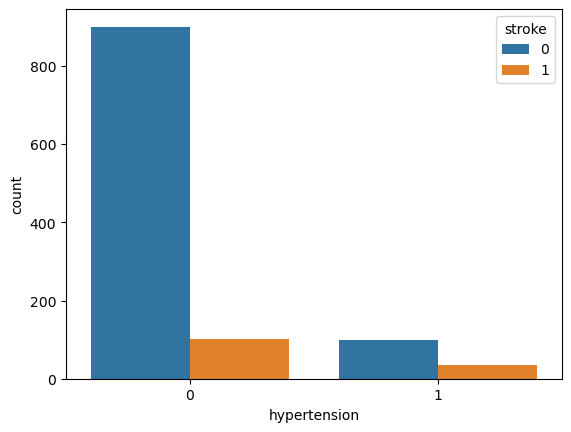

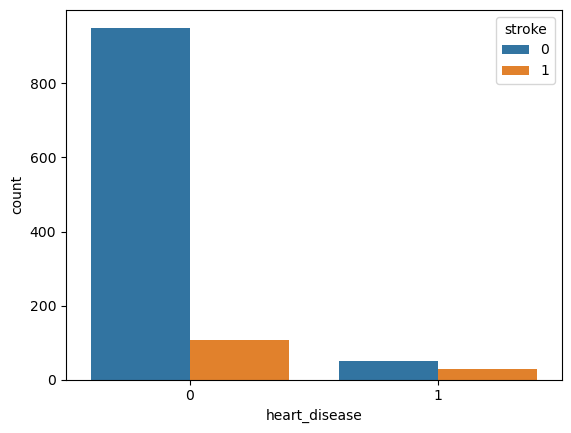

In [46]:
for i in df.select_dtypes(include="integer").drop("stroke",axis=1):
    plt.figure()
    sns.countplot(i, hue="stroke", data=df)

In [66]:
df["age"]= pd.to_numeric(df["age"],errors="coerce")
df["age"].fillna(value=82,inplace=True)

In [68]:
#assessing normality 
for i in df.select_dtypes(include="float"):
    stat= shapiro(df[i])
    print(f"the result of normality for {i} is: ")
    print(f"statistic value: {stat.statistic: .3f}")
    print(f"and p value is: {stat.pvalue: .3f}")
    if stat.pvalue <=0.05:
        print(f"the conclusion is: the column {i} is not normally distributed")
    else:
        print(f"the conlusion is: the column {i} is normally distributed")
    print()

the result of normality for age is: 
statistic value:  0.961
and p value is:  0.000
the conclusion is: the column age is not normally distributed

the result of normality for avg_glucose_level is: 
statistic value:  0.797
and p value is:  0.000
the conclusion is: the column avg_glucose_level is not normally distributed

the result of normality for bmi is: 
statistic value:  0.967
and p value is:  0.000
the conclusion is: the column bmi is not normally distributed



In [56]:
df.select_dtypes(include=["float","integer"]).drop(["hypertension","heart_disease","stroke"],axis=1)

,avg_glucose_level,bmi
0,70.66,27.2
1,85.81,18.6
2,60.56,33.0
3,205.77,46.0
4,90.42,16.2
...,...,...
1132,110.17,20.3
1133,92.98,18.9
1134,234.35,25.3
1135,80.43,29.7


<AxesSubplot:xlabel='age'>

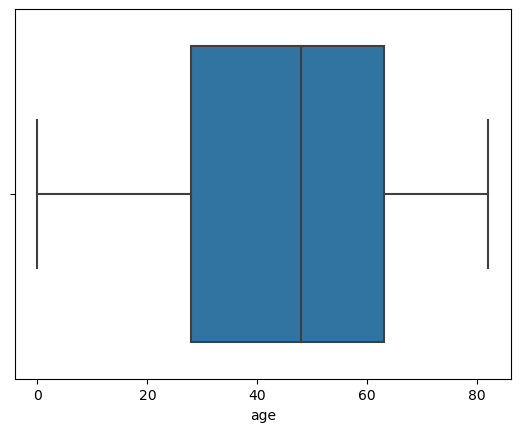

In [69]:
plt.figure()
sns.boxplot("age",data=df)

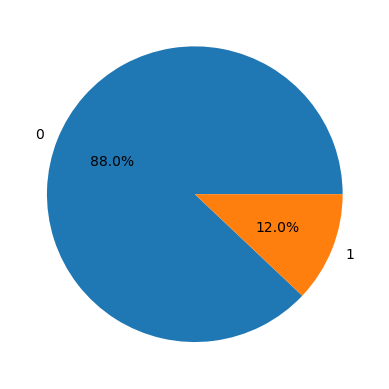

In [81]:
plt.figure()
plt.pie(df["stroke"].value_counts(),labels= df["stroke"].unique(), autopct="%1.1f%%")
plt.show()

<AxesSubplot:>

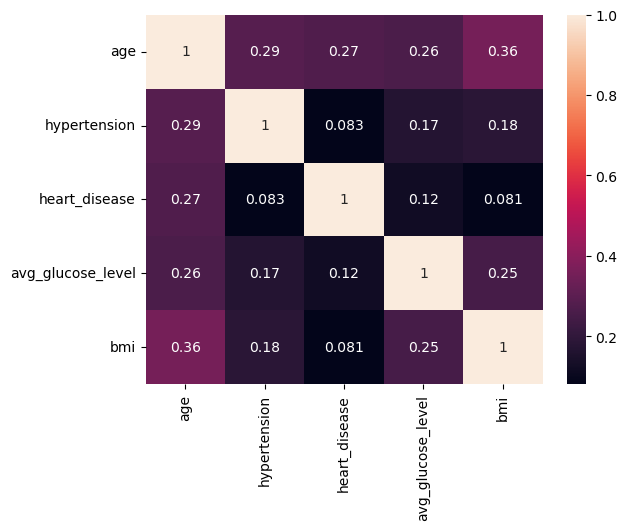

In [84]:
plt.figure()
sns.heatmap(df.drop("stroke",axis=1).corr(),annot=True)

In [89]:
df["ever_married"]=df["ever_married"].replace({"No":0, "Yes":1})

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,31.0,0,0,0,Govt_job,Rural,70.66,27.2,never smoked,0
1,Female,13.0,0,0,0,children,Rural,85.81,18.6,Unknown,0
2,Male,18.0,0,0,0,Private,Urban,60.56,33.0,never smoked,0
3,Female,65.0,0,0,1,Private,Urban,205.77,46.0,formerly smoked,1
4,Male,4.0,0,0,0,children,Rural,90.42,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1132,Female,1.0,0,0,0,children,Rural,110.17,20.3,Unknown,0
1133,Male,6.0,0,0,0,children,Rural,92.98,18.9,Unknown,0
1134,Male,81.0,0,0,1,Private,Urban,234.35,25.3,formerly smoked,0
1135,Female,81.0,1,0,1,Private,Rural,80.43,29.7,never smoked,1


In [90]:
df["gender"]=df["gender"].replace({"Male":1,"Female":0})

In [94]:
df["Residence_type"]=df["Residence_type"].replace({"Rural":0,"Urban":1})

In [151]:
from scipy.stats import chi2_contingency
col = df[["Residence_type","ever_married","heart_disease","hypertension"]]
cross_tab={}

for i in col:
    cross_tab[i]= pd.crosstab(col[i],df["stroke"])
    
for column_name, crosstab_df in cross_tab.items():
    chi2,p,_,_= chi2_contingency(crosstab_df)
    
    print(column_name)
    print(crosstab_df)
    print(chi2)
    print(f"{p: .3f}")
    print()

Residence_type
stroke            0   1
Residence_type         
0               494  56
1               506  81
3.1726936061977695
 0.075

ever_married
stroke          0    1
ever_married          
0             353   15
1             647  122
31.53659446658032
 0.000

heart_disease
stroke           0    1
heart_disease          
0              951  108
1               49   29
47.39243128542071
 0.000

hypertension
stroke          0    1
hypertension          
0             900  102
1             100   35
26.36937640740417
 0.000



In [157]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm
col = df[["Residence_type","ever_married","heart_disease","hypertension"]]
cross_tab={}
OR={}

for i in col:
    cross_tab[i]= pd.crosstab(col[i],df["stroke"])
    orc= sm.stats.Table2x2(cross_tab[i])
    OR[i]= orc.oddsratio
    
for column_name, crosstab_df in cross_tab.items():
    chi2,p,_,_= chi2_contingency(crosstab_df)
    
    print(column_name)
    print(crosstab_df)
    print(chi2)
    print(f"{p: .3f}")
    print()

for column_name, odds_ratio in OR.items():
    print(column_name, odds_ratio)   

Residence_type
stroke            0   1
Residence_type         
0               494  56
1               506  81
3.1726936061977695
 0.075

ever_married
stroke          0    1
ever_married          
0             353   15
1             647  122
31.53659446658032
 0.000

heart_disease
stroke           0    1
heart_disease          
0              951  108
1               49   29
47.39243128542071
 0.000

hypertension
stroke          0    1
hypertension          
0             900  102
1             100   35
26.36937640740417
 0.000

Residence_type 1.4121259175607002
ever_married 4.437506439979392
heart_disease 5.211451247165533
hypertension 3.088235294117647


In [174]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm
col = df[["Residence_type","ever_married","heart_disease","hypertension"]]
cross_tab={}
OR={}
crammers_v={}

for i in col:
    cross_tab[i]= pd.crosstab(col[i],df["stroke"])
    orc= sm.stats.Table2x2(cross_tab[i])
    OR[i]= orc.oddsratio
    
    table=cross_tab[i]
    chi2,_,_,_= chi2_contingency(table)
    n=table.sum().sum()
    min_dim= min(table.shape)-1
    crammers_v[i]=np.sqrt(chi2/(n*min_dim))

    print(i)
    print(crosstab_df)
    print()
    print(chi2)
    print(f"{p: .3f}")
    print()

for column_name, odds_ratio in OR.items():
    print(column_name, odds_ratio)
    
for column_name, v in crammers_v.items():
    print()
    print(column_name, v)

Residence_type
stroke          0    1
hypertension          
0             900  102
1             100   35

3.1726936061977695
 0.000

ever_married
stroke          0    1
hypertension          
0             900  102
1             100   35

31.53659446658032
 0.000

heart_disease
stroke          0    1
hypertension          
0             900  102
1             100   35

47.39243128542071
 0.000

hypertension
stroke          0    1
hypertension          
0             900  102
1             100   35

26.36937640740417
 0.000

Residence_type 1.4121259175607002
ever_married 4.437506439979392
heart_disease 5.211451247165533
hypertension 3.088235294117647

Residence_type 0.052824310171707606

ever_married 0.1665432994601027

heart_disease 0.2041616947728129

hypertension 0.15228940765152799


In [186]:
from scipy.stats import f_oneway

for i in df[["age","bmi","avg_glucose_level"]]:
    group1=df[df["stroke"]==1][i]
    group2=df[df["stroke"]==0][i]
    ANOVA= f_oneway(group1,group2)
    print(i)
    print(f"{ANOVA.statistic: .3f}")
    print(f"{ANOVA.pvalue: .3f}")

age
 185.504
 0.000
bmi
 5.970
 0.015
avg_glucose_level
 40.130
 0.000


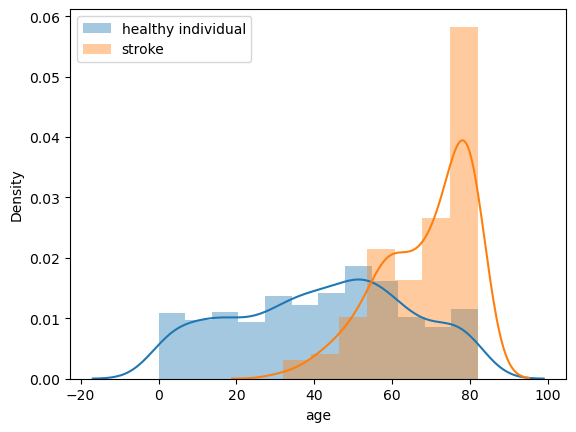

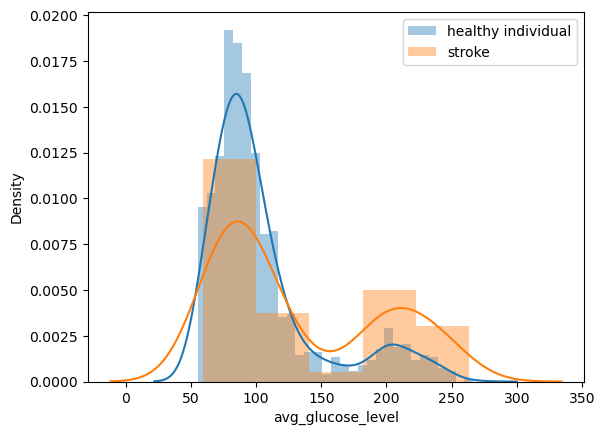

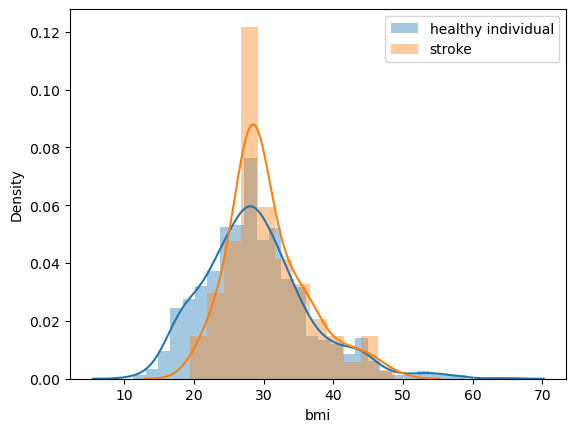

In [206]:
for i in df.select_dtypes(include="float"):
    group1= df[df["stroke"]==1][i]
    group2= df[df["stroke"]==0][i]
    plt.figure()
    sns.distplot(group2, label="healthy individual")
    sns.distplot(group1,label="stroke")
    plt.legend()
    plt.show()